**Problem Background** 

"*Marriage Therapy* 

Question: Do behavioral and insight therapies for marriage counselingdiffer in effectiveness? 

Behavioral therapy stresses the skills of managing interpersonal relationships and insight therapy stresses working out underlying difficulties. Fifty-nine couples were randomly assigned, with 29 to the behavioral therapy group and 30 to the insight therapy group. At a 4-year follow-up, 15 of the behavioral group were happily married (HM),three were distressed married (DM), and 11 were divorced (DIV). The insight group had 24 HM, five DM, and one DIV: (Data from Douglas K. Snyder, Robert M. Wills, ArvetaGrady-Fletcher, “Long-Term Effectiveness of Behavioral Versus Insight-Oriented MaritalTherapy”,Journal of Consulting and Clinical Psychology, 1991, v. 59, No. 1, 138–141)(Table 9.2).TA "


In [131]:
#Data Table 1
import pandas as pd
import numpy as np

table1 = {'Happily Married': [15,24,39],
         'Distressed Married': [3,5,8],
         'Divorced': [11,1,12],
          'Total': [29,30,59]
          }
data1= pd.DataFrame(table1, index=['Behavioral','Insight','Total 2'])
print('\033[1m \033[95m'+'Marriage Therapy')
display(data1.head())

 Marriage Therapy


,Happily Married,Distressed Married,Divorced,Total
Behavioral,15,3,11,29
Insight,24,5,1,30
Total 2,39,8,12,59


**Question**

Are the differences among the groups significant? One way to solve this dilemma is to use the concept of "Departure from expecation." The idea is simple given that it test the scenario in which 'what we would expect if chance variation was at work ' and then we compare our result (statistic from sample) and where it fits in this chance model.

In [147]:
#Calculating Expectation (If treatement gave same results- no difference among the different categories/treatemtns)

#Behavioral Categories
b_HM = (data1.loc['Total 2','Happily Married']/data1.loc['Total 2','Total'])* data1.loc['Behavioral','Total']
b_DM = (data1.loc['Total 2','Distressed Married']/data1.loc['Total 2','Total'])* data1.loc['Behavioral','Total']
b_D = (data1.loc['Total 2','Divorced']/data1.loc['Total 2','Total'])* data1.loc['Behavioral','Total']

#Insight Categories
i_HM = (data1.loc['Total 2','Happily Married']/data1.loc['Total 2','Total'])* data1.loc['Insight','Total']
i_DM = (data1.loc['Total 2','Distressed Married']/data1.loc['Total 2','Total'])* data1.loc['Insight','Total']
i_D = (data1.loc['Total 2','Divorced']/data1.loc['Total 2','Total'])* data1.loc['Insight','Total']

#Putting in tabular format 
table2 = {'Happily Married': [0,0],
         'Distressed Married': [0,0],
         'Divorced': [0,0]
          }
        
#Data Frame 
data2= pd.DataFrame(table2, index=['Behavioral','Insight'])

#Adding results
data2.loc['Behavioral','Happily Married'] = round(b_HM,2)
data2.loc['Behavioral','Distressed Married'] = round(b_DM,2)
data2.loc['Behavioral','Divorced'] = round(b_D,2)

data2.loc['Insight','Happily Married'] = round(i_HM,2)
data2.loc['Insight','Distressed Married'] = round(i_DM,2)
data2.loc['Insight','Divorced'] = round(i_D,2)

#Final Output
print('\033[1m \033[94m'+'Expected Outcomes if Treatments Yield the Same Results')
display(data2.head())


 Expected Outcomes if Treatments Yield the Same Results


,Happily Married,Distressed Married,Divorced
Behavioral,19.17,3.93,5.9
Insight,19.83,4.07,6.1


The next step is to determine the extent to which the observed results differ from the expected results. Direction does not matter so we take absolute values.

In [157]:
#Calculating Differences 

#Behavioral Categories
b_HM = abs((data1.loc['Behavioral','Happily Married'] - data2.loc['Behavioral','Happily Married']))
b_DM = abs((data1.loc['Behavioral','Distressed Married'] - data2.loc['Behavioral','Distressed Married']))
b_D = abs((data1.loc['Behavioral','Divorced'] - data2.loc['Behavioral','Divorced']))

#Insight Categories
i_HM = abs((data1.loc['Insight','Happily Married'] - data2.loc['Insight','Happily Married']))
i_DM = abs((data1.loc['Insight','Distressed Married'] - data2.loc['Insight','Distressed Married']))
i_D = abs((data1.loc['Insight','Divorced'] - data2.loc['Insight','Divorced']))

#Putting in tabular format 
table3 = {'Happily Married': [0,0],
         'Distressed Married': [0,0],
         'Divorced': [0,0]
          }
        
#Data Frame 
data3= pd.DataFrame(table3, index=['Behavioral','Insight'])

#Adding results
data3.loc['Behavioral','Happily Married'] = round(b_HM,2)
data3.loc['Behavioral','Distressed Married'] = round(b_DM,2)
data3.loc['Behavioral','Divorced'] = round(b_D,2)

data3.loc['Insight','Happily Married'] = round(i_HM,2)
data3.loc['Insight','Distressed Married'] = round(i_DM,2)
data3.loc['Insight','Divorced'] = round(i_D,2)

#Final Output
print('\033[1m \033[91m'+'Expected Outcomes if Treatments Yield the Same Results')
display(data3.head())

dif_sum = sum(data3.loc['Behavioral'].values) + sum(data3.loc['Insight'].values)
print("Sum of differences: " , dif_sum)

 Expected Outcomes if Treatments Yield the Same Results


,Happily Married,Distressed Married,Divorced
Behavioral,4.17,0.93,5.1
Insight,4.17,0.93,5.1


Sum of differences:  20.4


**The Key Question**

*Is this a greater sum of differences than we might expect from a random allocation of outcomes to 29 couples of the behavioral group and 30 couples of the insight group?*

```
Permuataiton Procedure Resampling 
1. Fill a single urn with 39 ones (HM), 8 twos (distress married), and 12 threes(divorced).
2. Shuffle the urn and take two samples without replacement of sizes 29 and 30.
3. Count the number of ones, twos, and threes in each sample.
4. Reconstruct the resampled counterparts to Tables 1 and 3 and record the resampled statistic of interest—the sum of absolute differences−observed value=20.42.
5. Repeat steps two through four 10,000 times.
6. Determine how often the resampled sum of differences exceeds the observed value of2 0.42.
```

P-value:  0.0072  with a 95% CL and an alpha of 5% we are bound to reject the null hypothesis in favor of the alternative. The results are statistically significant- The chance occurrence of the observed value is so rare that we conclude that there is a real difference among the therapies




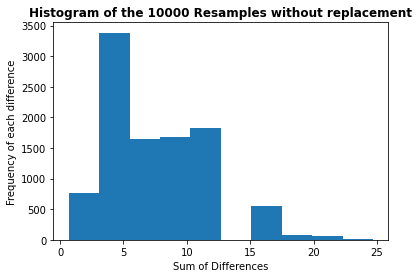

<Figure size 3600x1440 with 0 Axes>

In [186]:
import numpy as np
#Create reppresenative sample data
thy_data =  np.array([1]*39 +[2]*8+ [3]*12)
#Shuffle
np.random.shuffle(thy_data)

differences = []
#10,000 trials without replacement 
for x in range(10000):
  np.random.shuffle(thy_data)
  temp_data = thy_data.tolist()

  #Behavioral Sample (29)
  length= len(temp_data)
  b_HM= 0
  b_DM= 0
  b_D = 0 

  for x in range(29):
    a= np.random.randint(0,length)
    b= temp_data[a]
    if (b==1):
      b_HM +=1
    elif (b==2):
      b_DM +=1
    else:
      b_D +=1
    
    del temp_data[a]
    length -=1
  
  #Insight Sample (30) - since its with replacement we can just count the remaining 1's,2's,th
  temp = np.array(temp_data)
  i_HM=sum(temp==1)
  i_DM=sum(temp==2)
  i_D=sum(temp==3)


  #Expectations
  #Behavioral
  exp_b_HM = ((b_HM +i_HM)/59) * 29
  exp_b_DM = ((b_DM +i_DM)/59) * 29
  exp_b_D = ((b_D +i_D)/59) *  29

  #Insight
  exp_i_HM = ((b_HM +i_HM)/59) * 30
  exp_i_DM = ((b_DM +i_DM)/59) * 30
  exp_i_D = ((b_D +i_D)/59) * 30


  #Absolute value of Observed - Expected 
  #Behavioral
  diff_b_HM = abs(b_HM-exp_b_HM)
  diff_b_DM = abs(b_DM-exp_b_DM)
  diff_b_D = abs(b_D-exp_b_D)

  #Insight
  diff_i_HM = abs(i_HM-exp_i_HM)
  diff_i_DM = abs(i_DM-exp_i_DM)
  diff_i_D = abs(i_D-exp_i_D)

  #Sum of differences
  diff_sum = diff_b_HM+ diff_b_DM+ diff_b_D+ diff_i_HM+ diff_i_DM+ diff_i_D
  differences.append(diff_sum)



#Conclusion, let us calculate the p-value
p_value = sum(np.array(differences)>= (20.4))/10000
print('P-value: ', p_value, ' with a 95% CL and an alpha of 5% we are bound to reject the null hypothesis in favor of the alternative. The results are statistically significant- The chance occurrence of the observed value is so rare that we conclude that there is a real difference among the therapies')
print('\n')

import matplotlib.pyplot as plt
_=plt.hist(differences)
_=plt.title('Histogram of the 10000 Resamples without replacement', fontweight='bold')
_=plt.xlabel('Sum of Differences')
_=plt.ylabel('Frequency of each difference')
_=plt.figure(figsize=(50,20))
_=plt.show()
